<a href="https://colab.research.google.com/github/valesierrai/Integracion-de-Datos-y-Prospectiva/blob/main/M%C3%A9todo_Aceptaci%C3%B3n_Rechazo.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Método Aceptación - Rechazo

##0. Se cargan las líbrerias

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns #Libreria para la gráfica de distribuciones
import random as rnd # Libreria para los números aleatorios
from scipy.stats import skew, kurtosis #coeficiente de asímetria y curtosis

#Para la carga automatica de los datos
from google.colab import drive #Cargar datos desde drive
drive.mount('/content/drive')

Mounted at /content/drive


##1. Se cargan las líbrerias de trabajo

In [ ]:
nxlo = '/content/drive/MyDrive/Colab Notebooks/Integración de Datos y Prospectiva/Bases de Datos/2. FallasTecnológicas.xlsx' #Internos
nxle = '/content/drive/MyDrive/Colab Notebooks/Integración de Datos y Prospectiva/Bases de Datos/2. AdmonEjecProcesos.xlsx' #Externos

XDBo = pd.read_excel(nxlo, sheet_name= 0); XDBo=XDBo.dropna()
XDBe = pd.read_excel(nxle, sheet_name= 0); XDBe=XDBe.dropna()

LDAo = np.multiply(XDBo.iloc[:,3], XDBo.iloc[:,4])
LDAe = np.multiply(XDBe.iloc[:,3], XDBe.iloc[:,4])

<ipython-input-4-c3668f62f0ea>:5: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


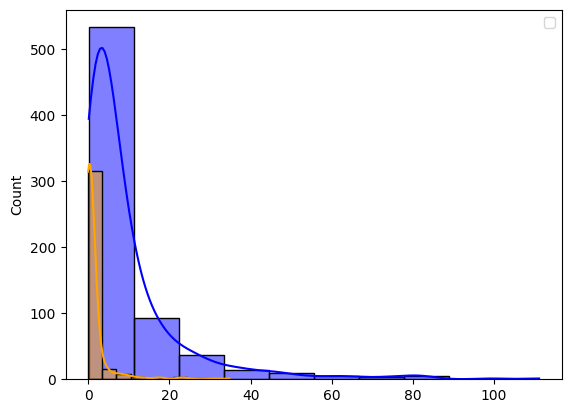

In [ ]:
#Se procede con la graficar
plt.figure()
sns.histplot(LDAo, kde = True, bins = 10, color = 'blue')
sns.histplot(LDAe, kde = True, bins = 10, color = 'orange')
plt.legend()
plt.show()

##2. Creamos el método para calcular las propiedades estadisticas de una variable

In [ ]:
def metricas (XLDA):
  u = np.mean(XLDA)
  var = np.var(XLDA)
  stdv = np.sqrt(var)
  cas = skew(XLDA)
  kur = kurtosis(XLDA)

  if abs(cas) < 0.5 and abs(kur) < 0.5:
    tpdist = 'Posible distribución normal'
  elif cas > 0 and abs(kur) > 3:
    if kur >=8:
      tpdist = 'Posible distribución exponencial'
    elif kur >=6:
        tpdist = 'Posible distribución gamma'
    else:
        tpdist = 'Posible distribución Weibull'

  elif cas < 0 and abs(kur) < 3:
    tpdist = 'Posible distribución beta'
  elif kur < 3:
    tpdist = 'Posible distribución uniforme'
  else:
    tpdist = 'No es posible determinar la distribución'

  return u, var, stdv, cas, kur, tpdist

##3. Se calculan las propiedades estadisticas de las pérdidas, tanto las externas como internas

In [ ]:
mobs = metricas(LDAo)

#Métricas de los datos internos
print("La media de los datos internos es:", mobs[0])
print("La desviación estandár de los datos internos es:", mobs[2])
print("La asimetria de los datos internos es:", mobs[3])
print("La kurtosis de los datos internos es:", mobs[4])
print("El tipo de distribución de los datos internos es:",mobs[5])

#Solamente me interesan estos limites, por que me interesan los datos de los limites internos
LS = mobs[0]+2*mobs[2]; LI = mobs[0]-2*mobs[2]
print("El limite superior de los datos internos es:", LS)
print("El limite inferior de los datos internos es:", LI)

La media de los datos internos es: 9.45111269614836
La desviación estandár de los datos internos es: 13.707471533012761
La asimetria de los datos internos es: 3.3483604527095365
La kurtosis de los datos internos es: 14.16771362667782
El tipo de distribución de los datos internos es: Posible distribución exponencial
El limite superior de los datos internos es: 36.866055762173886
El limite inferior de los datos internos es: -17.96383036987716


In [ ]:
#Métricas de los datos externos
mdex = metricas(LDAe)
print("La media de los datos externos es:", mdex[0])
print("La desviación estandár de los datos externos es:", mdex[2])
print("La asimetria de los datos externos es:", mdex[3])
print("La kurtosis de los datos externos es:", mdex[4])
print("El tipo de distribución de los datos externos es:",mdex[5])

#Limites externos
LSe = mdex[0]+2*mdex[2]; LIe = mdex[0]-2*mdex[2]
print("El limite superior de los datos externos es:", LSe)
print("El limite inferior de los datos externos es:", LIe)

La media de los datos externos es: 1.469187040102234
La desviación estandár de los datos externos es: 4.008350447638778
La asimetria de los datos externos es: 5.059212525816747
La kurtosis de los datos externos es: 29.643693069779438
El tipo de distribución de los datos externos es: Posible distribución exponencial
El limite superior de los datos externos es: 9.48588793537979
El limite inferior de los datos externos es: -6.547513855175321


##4. Procedemos con la gráfica de las funciones de pertenencia

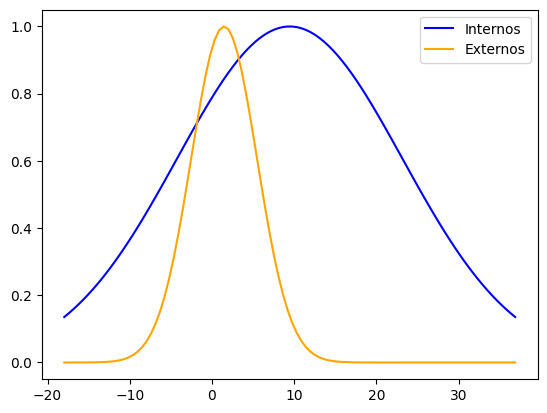

In [ ]:
X = np.linspace(LI, LS, 100) # Como es para gráfica tomo el intervalo mas grande

#Está es la función de los internos
VPo = np.exp(-0.5*((X-mobs[0])/mobs[2])**2)
#Está es la función de los externos
VPe = np.exp(-0.5*((X-mdex[0])/mdex[2])**2)

#La gráfica de integración
plt.figure()
plt.plot(X, VPo, color = 'blue', label = 'Internos')
plt.plot(X, VPe, color = 'orange', label = 'Externos')
plt.legend()
plt.show()


##5. Se procede con la integración de los datos

In [ ]:
xint = LDAe #Los datos de integración son los externos

#Evaluamos los datos externos, con respecto a la estructura interna
VPoint = np.exp(-0.5*((xint-mobs[0]/mobs[2])**2))

#Evaluamos los datos externos con respecto a la estructura externa.
VPeint = np.exp(-0.5*((xint-mdex[0]/mdex[2])**2))

#Donde los datos externos esten por debajo de los datos internos
filas = np.where(VPeint<=VPoint)[0]
XDint = LDAe[filas] #datos de integracion

#Se integran los datos
LDAo2 = np.concatenate((LDAo,XDint))

#Como quedó la variable después
mint = metricas(LDAo2)
print("La media de los datos externos es:", mint[0])
print("La desviación estandár de los datos externos es:", mint[2])
print("La asimetria de los datos externos es:", mint[3])
print("La kurtosis de los datos externos es:", mint[4])

La media de los datos externos es: 8.7063202847983
La desviación estandár de los datos externos es: 13.055761991665811
La asimetria de los datos externos es: 3.49857237763576
La kurtosis de los datos externos es: 15.769742761550187


In [ ]:
cas_antes=mobs[3]
cas_despues=mint[3]
var_cas = ((cas_antes-cas_despues)/cas_antes)*100
print("La asimetría cambio un", var_cas)
kur_antes = mobs[4]
kur_despues = mint[4]
var_kur = ((kur_antes-kur_despues)/kur_antes)*100
print("La kurtosis cambio un", var_kur)

La asimetría cambio un -4.486133648026748
La kurtosis cambio un -11.307605285412778


# **6. Análisis de Resultados**
Para la integración de datos a las operaciones del negocio, se tomó una base de datos externa la cual poseía un total de 350 datos. Esta base de datos posee las siguientes métricas estadísticas. la media con un valor de tal, la desviación con un valor de tal, el coeficiente de asimetría con un valor de tal y un coeficiente de curtosis con un valor de tal. La base de datos interna posee un ttoal de 701 datos con las siguientes métricas estadísticas: media, varianza, curtosis y coeficiente, de estas métricas se puede observar la diferencia tan grande que existe entre la media de las pérdidas, lo que muestra la heterogeneidad entre los datos,

Como resultado del proceso de integración mediante el método de aceptación y rechazo, se pudieron untefran un total de 35 datos solamente, lo que representa un 10% del total de los datos externos (350). Es importante mencionar que las métricas estadísticas de curtosis y asimetría no tuvieron variaciones significativas luego de la integración lo que garantiza la estabilidad original de los datos.